In [4]:
import forecastio
import datetime

api_key = "b373c9329858e58db0e419465bc3b7d1"
nijlat = 51.842054
nijlng = 5.859681

muclat = 48.
muclng = 11.

lat = nijlat
lng = nijlng

In [3]:
byDay = forecast.daily()
print byDay.summary
print byDay.icon
a=byDay.data[0]

NameError: name 'forecast' is not defined

In [3]:
print a.d
print a.sunriseTime

{u'apparentTemperatureMinTime': 1479524400, u'precipType': u'rain', u'cloudCover': 0.39, u'precipIntensityMaxTime': 1479510000, u'temperatureMin': 1.5, u'summary': u'Partly cloudy throughout the day.', u'dewPoint': 1.97, u'apparentTemperatureMax': 4.81, u'temperatureMax': 7.69, u'temperatureMaxTime': 1479560400, u'windBearing': 253, u'moonPhase': 0.68, u'sunsetTime': 1479570141, u'pressure': 1004.4, u'precipProbability': 0.18, u'apparentTemperatureMin': -3.39, u'precipIntensityMax': 0.1092, u'icon': u'partly-cloudy-night', u'apparentTemperatureMaxTime': 1479560400, u'humidity': 0.82, u'ozone': 317.99, u'windSpeed': 2.3, u'time': 1479510000, u'precipIntensity': 0.0279, u'sunriseTime': 1479539077, u'temperatureMinTime': 1479524400}
2016-11-19 07:04:37


In [4]:
print datetime.datetime.now().day
print datetime.datetime.now().month
print datetime.datetime.now().hour
type(datetime.datetime.now().year)

19
11
21


int

In [7]:
heute = datetime.datetime.today()
gestern = datetime.datetime.today() - datetime.timedelta(days=1)

current_time = heute - datetime.timedelta(hours = 6)

In [8]:
todayforecast = forecastio.load_forecast(api_key, lat, lng, time=heute)
yesterdayforecast = forecastio.load_forecast(api_key, lat, lng, time=gestern,units='si')

In [11]:
print yesterdayforecast.currently().d['apparentTemperature']
print todayforecast.currently().d['apparentTemperature']
print gestern

-0.5
0.08
2017-01-14 15:46:19.350191


In [134]:
import numpy as np

years = np.arange(1915,2016)
temps = np.ones(101)*100

for deltayear in range(101):
    year = deltayear + 1915
    weihnachten = datetime.datetime(year,12,24)
    try:
        temp = forecastio.load_forecast(api_key, lat, lng, time=weihnachten).currently().d['temperature']
        print year, temp
        temps[deltayear] = temp
    except:
        print year, 'NA'
        temps[deltayear] = np.nan

1915 2.71
1916 2.66
1917 2.71
1918 2.71
1919 2.71
1920 2.66
1921 2.71
1922 2.71
1923 2.71
1924 2.66
1925 2.71
1926 2.71
1927 2.71
1928 2.66
1929 2.71
1930 2.71
1931 0.51
1932 5.87
1933 NA
1934 NA
1935 NA
1936 NA
1937 5
1938 NA
1939 -2.3
1940 -3.34
1941 6.07
1942 4.09
1943 3.85
1944 NA
1945 NA
1946 NA
1947 NA
1948 NA
1949 3.43
1950 -2.68
1951 4.05
1952 5.07
1953 6.41
1954 2.38
1955 7.22
1956 -0.13
1957 NA
1958 NA
1959 NA
1960 NA
1961 NA
1962 NA
1963 NA
1964 NA
1965 NA
1966 NA
1967 NA
1968 NA
1969 NA
1970 NA
1971 NA
1972 NA
1973 NA
1974 NA
1975 NA
1976 NA
1977 NA
1978 NA
1979 NA
1980 NA
1981 NA
1982 NA
1983 NA
1984 NA
1985 NA
1986 NA
1987 NA
1988 NA
1989 NA
1990 NA
1991 NA
1992 NA
1993 NA
1994 NA
1995 NA
1996 NA
1997 NA
1998 NA
1999 NA
2000 NA
2001 NA
2002 NA
2003 NA
2004 NA
2005 NA
2006 NA
2007 NA
2008 NA
2009 NA
2010 NA
2011 NA
2012 NA
2013 NA
2014 NA
2015 NA


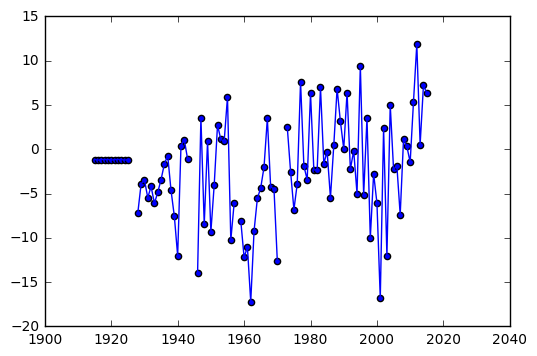

In [131]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(years,temps)
plt.scatter(years,temps)

(array([ 0.01429915,  0.00953277,  0.01906553,  0.0285983 ,  0.0285983 ,
         0.03813107,  0.09532767,  0.06196299,  0.02383192,  0.04766384,
         0.0285983 ,  0.00476638,  0.00953277,  0.        ,  0.01429915]),
 array([-16.16      , -13.80266667, -11.44533333,  -9.088     ,
         -6.73066667,  -4.37333333,  -2.016     ,   0.34133333,
          2.69866667,   5.056     ,   7.41333333,   9.77066667,
         12.128     ,  14.48533333,  16.84266667,  19.2       ]),
 <a list of 15 Patch objects>)

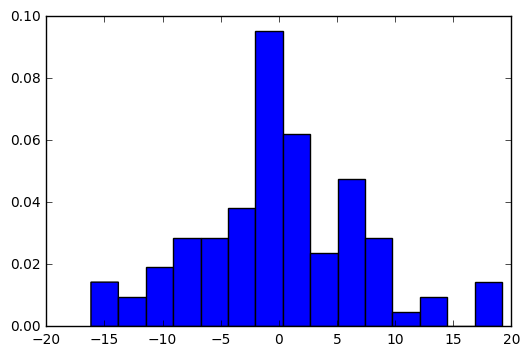

In [101]:
dtemp = temps[1:]-temps[0:-1]
cleaneddtemp = dtemp[np.logical_not(np.isnan(dtemp))]
plt.hist(cleaneddtemp,15,normed=1)

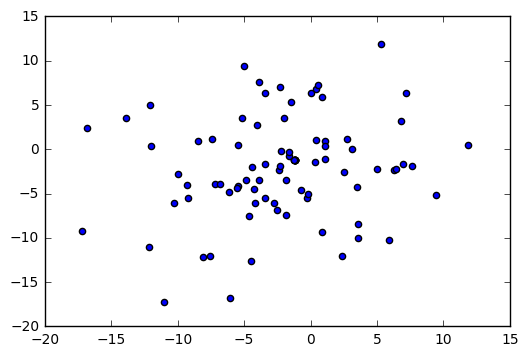

In [102]:
plt.scatter(temps[0:-1],temps[1:])

In [129]:
import scipy.stats as st

dtemp = temps[1:]-temps[0:-1]
indt = np.logical_not(np.isnan(dtemp))*(dtemp!=0.)
mtemp = temps[0:-1]
ptemp = temps[1:]

cmtemp = mtemp[indt]
cptemp = ptemp[indt]

st.pearsonr(cmtemp[0:-1],cptemp[1:])


(0.38085319306600929, 0.00035161434433365608)

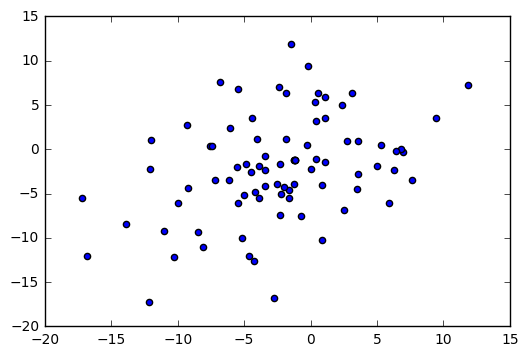

In [130]:
plt.scatter(cmtemp[0:-1],cptemp[1:])

(array([ 0.00772231,  0.01544461,  0.01930576,  0.03088922,  0.06950075,
         0.09652882,  0.05019499,  0.02316692,  0.02316692,  0.00772231]),
 array([-17.22, -14.31, -11.4 ,  -8.49,  -5.58,  -2.67,   0.24,   3.15,
          6.06,   8.97,  11.88]),
 <a list of 10 Patch objects>)

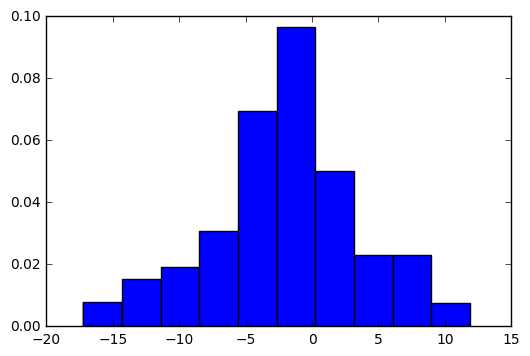

In [104]:
plt.hist(cmtemp,10,normed=1)

In [110]:
st.pearsonr(np.arange(1000)+np.random.randn(1000)*0.1,np.arange(1000)+np.random.randn(1000)*0.1)

(0.99999987563497839, 0.0)

In [128]:
indt

array([False, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [14]:
3 => 3

SyntaxError: invalid syntax (<ipython-input-14-1d35c648b7fe>, line 1)